## Задание
* Реализовать предыдущие 2 задания в формате ООП

# Загрузка данных

In [ ]:
import requests
import pandas as pd
import sqlite3

class OurDomDownloader:
    
    '''
    Позволяет скачать данные по строящимся зданиям с сайта "Наш Дом РФ" 
    и сохранить данные в формате .xlsx, .pkl, sqlite.
    '''
    
    def __init__(self, output_limit: int):
        self.output_limit = output_limit
        self.home_ids = []
              
    def download_house_list(self):
        '''
        Собирает индексы карточек строящихся объектов
        '''
        offset = 0
        while True:
            url = (
                'https://xn--80az8a.xn--d1aqf.xn--p1ai/'
                '%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/'
                f'api/kn/object?offset={offset}&limit={self.output_limit}'
                '&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
            )
            res = requests.get(url)
            objects_data = res.json()
            obj_data = objects_data.get('data')
            if not obj_data:
                print("No data in objects_data")
                return 
            list_obj_data = obj_data.get("list")
            if not list_obj_data:
                break
            self.home_ids.extend([x.get('objId') for x in list_obj_data])
            offset += self.output_limit
            break # используется для тестирования
            
    def download_house_data(self):
        '''
        Собирает данные из карточек строящихся объектов
        '''
        base_url = (
            'https://xn--80az8a.xn--d1aqf.xn--p1ai/'
            '%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/'
        )
        list_data_homes = []
        for home_id in self.home_ids:
            url = base_url + str(home_id)
            res = requests.get(url)
            list_data_homes.append(res.json().get('data'))
        df = pd.json_normalize(data=list_data_homes)
        return df
    
    def get_house_data(self):
        '''
        Возвращает данные по объектам
        '''
        self.download_house_list()
        return self.download_house_data()
    
    # группа методов для импорта данных:
    
    @staticmethod
    def import_excel(data, file_name):
        data.to_excel(file_name + ".xlsx")
    
    @staticmethod
    def import_pkl(data, file_name):
        data.to_pickle(file_name + ".pkl")

    @staticmethod
    def import_sqlite(data, base_name, table_name):
        conn = sqlite3.connect(base_name)
        data = data.applymap(str)
        data.to_sql(table_name, conn)

In [ ]:
one_hundred_houses = OurDomDownloader(100)

In [ ]:
df = one_hundred_houses.get_house_data()

In [ ]:
pd.options.display.max_columns = 108
df.head(3)

,id,pdId,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objectTransportInfo,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.objGuarantyEscrowFlg,developer.govFundFlg,floorMin,floorMax,miniUrl,objFloorCnt,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,developer.developerGroupName,developer.companyGroupId,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,29679,124647,61,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:41,47.2238,38.8513,0,0,Комфорт,27-08-2022 01:25,[],0,normal,1,40800,18,1519.0,0,0,True,0,0,0,[],False,0,Не нормируется,7,7424,212-2,212-2,212-2,0,1,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093,0,61,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,28105,72,г Тюмень,68,2022-12-31,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,04-08-2022 14:30,57.1519,65.5536,1,0,Элитный,27-08-2022 01:25,"[{'objId': 13383, 'pdId': 28105, 'rpdId': 6221...",0,normal,1,39024,68,6293.78,10,0,True,0,1,1,[],False,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",626933,1,72,Киселев Сергей Михайлович,1,Акционерное общество,АО,0,0,4.0,20.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20.0,28-02-2023 12:00,"2,8",1.0,1.0,1.0,0.0,11.0,0.0,5.0,1.0,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,13.0,21.0,34.0,0.0,68.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13391,28101,72,"г Тюмень, ул Профсоюзная",44,2022-12-31,Другое,По желанию заказчика,Есть,41,4297.44,72-000096,https://xn--80az8a.xn--d1aqf.xn--p1a

# Обработка данных

In [ ]:
df['objReady100PercDt'] = pd.to_datetime(df['objReady100PercDt']).dt.year

In [ ]:
group_region = df.groupby('region', as_index=False).mean()
group_region = group_region[group_region['objPriceAvg'].notnull()]

In [ ]:
group_year = df.groupby(['objReady100PercDt'], as_index=False).count()

# Визуализация данных

In [ ]:
import enum
import matplotlib.pyplot as plt
import seaborn as sns

class PlotType(enum.Enum):
    '''
    Перечислены возможные к использованию библиотеки для визуализации
    '''
    matplotlib = enum.auto()
    seaborn = enum.auto()

class Visualizer:
    
    '''
    Строит 3 типа графика на основании данных Data Frame
    по передаваемым именам колонок
    '''
    
    def __init__(self, data: pd.core.frame.DataFrame):
        self.data = data
    
    @staticmethod
    def _create_figure(type_plot, xcolumn, ycolumn):
        '''
        Используется для оформелния графиков
        '''
        if type_plot is PlotType.matplotlib:
            title = 'Matplotlib plot'
        else:
            title = 'Seaborn plot'
        plt.figure(figsize=(17,5))
        plt.title(title, loc='left', size=16)
        plt.xlabel(xcolumn, size=12)
        plt.ylabel(ycolumn, size=12)
    
    def make_lineplot(self, xcolumn: str, ycolumn: str, type_plot: PlotType = PlotType.matplotlib):  
        Visualizer._create_figure(type_plot, xcolumn, ycolumn)
        if type_plot is PlotType.matplotlib:
            plt.plot(self.data[xcolumn], self.data[ycolumn])
        else:
            sns.lineplot(data=self.data, x=xcolumn, y=ycolumn)
        plt.show()
    
    def make_scatterplot(self, xcolumn: str, ycolumn: str, type_plot=PlotType.matplotlib):
        Visualizer._create_figure(type_plot, xcolumn, ycolumn)
        if type_plot is PlotType.matplotlib:
            plt.scatter(self.data[xcolumn], self.data[ycolumn])
        else:
            sns.scatterplot(data=self.data, x=xcolumn, y=ycolumn)
        plt.show()
    
    def make_boxplot(self, columns_list: list, type_plot=PlotType.matplotlib):
        plt.figure(figsize=(17,5))
        if type_plot is PlotType.matplotlib:
            plt.boxplot(df[columns_list])
            title = 'Matplotlib plot'
        else:
            sns.boxplot(data = df[columns_list])
            title = 'Seaborn plot'
        plt.title(title, loc='left', size=16)
        plt.show()

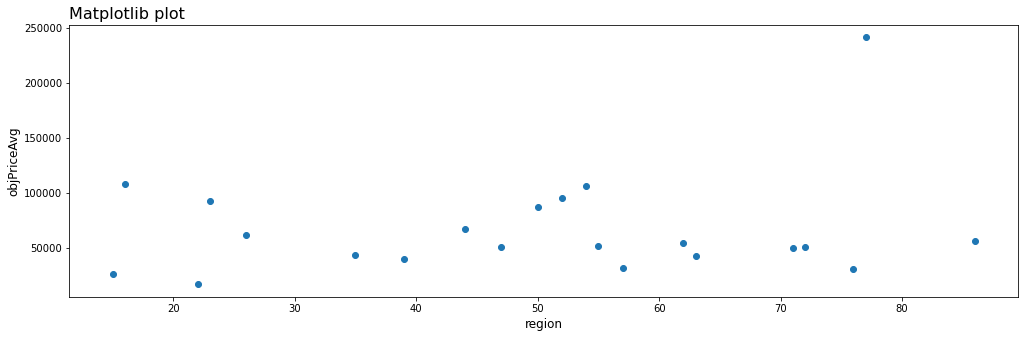

In [ ]:
v1 = Visualizer(group_region)
v1.make_scatterplot('region', 'objPriceAvg')

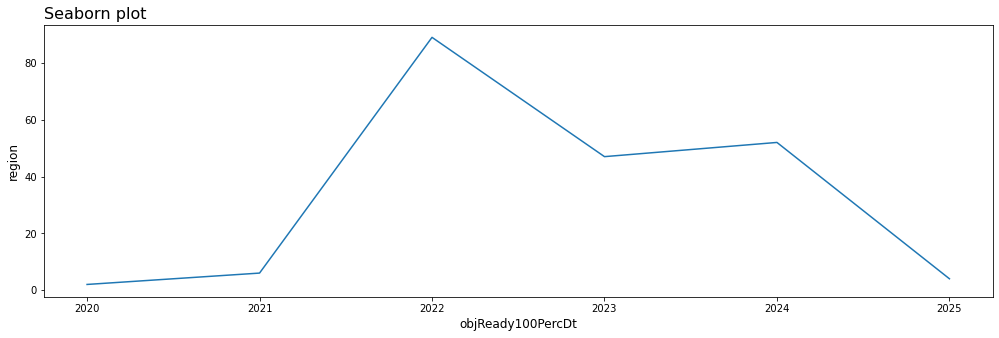

In [ ]:
v2 = Visualizer(group_year)
v2.make_lineplot('objReady100PercDt', 'region', PlotType.seaborn)

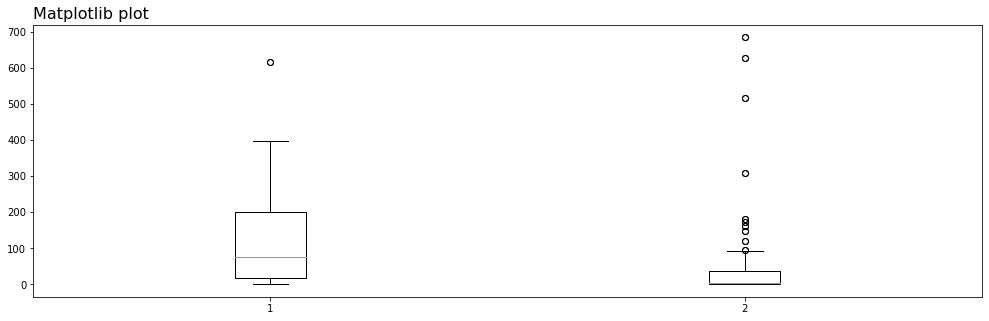

In [ ]:
v3 = Visualizer(df)
v3.make_boxplot(['objFlatCnt', 'objNonlivElemCnt'])

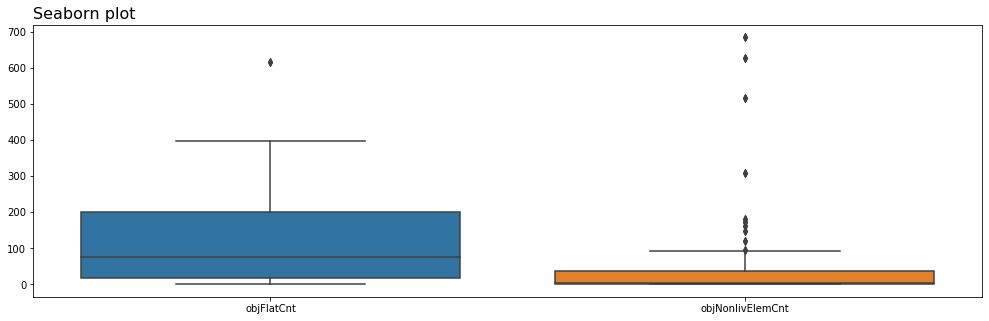

In [ ]:
v3.make_boxplot(['objFlatCnt', 'objNonlivElemCnt'], PlotType.seaborn)